In [9]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import time
import matplotlib.pyplot as plt
%matplotlib inline
import random

data = pd.read_csv('dogparkdata_2012to2018.csv')
data

,Unnamed: 0,names,times,valid
0,0,bdjdaabeacjjbibbafjcjdjfaibib,1/1/2012 8:31:46AM,Valid Access
1,1,abjejijgjejjbiagjebib,1/1/2012 10:27:20AM,Valid Access
2,2,abjejijgjejjbiagjebib,1/1/2012 10:52:26AM,Valid Access
3,3,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 10:52:48AM,Valid Access
4,4,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 11:19:56AM,Valid Access
5,5,acjhbbahjhbeabjibejjbiahjdjhabjejhjcbib,1/1/2012 11:20:13AM,Valid Access
6,6,acjhbbahjhbeabjibejjbiahjdjhabjejhjcbib,1/1/2012 11:35:37AM,Valid Access
7,7,acjijbbejhbeaejjbiabaabcaabebeaaafbib,1/1/2012 12:48:51PM,Valid Access
8,8,acjijbbejhbeaejjbiabaabcaabebeaaafbib,1/1/2012 1:22:28PM,Valid Access
9,9,afjcjdadjijdacjjbiagjcaabebibgbh,1/1/2012 1:51:26PM,Valid Access


In [10]:
data_array = np.array(data)
data_2012 = data_array[0:10891]
data_2013 = data_array[10891:20945]
data_2014 = data_array[20945:32605]
data_2015 = data_array[32605:49340]
data_2016 = data_array[49340:70150]
data_2017 = data_array[70150:87560]
data_2018 = data_array[87560:110066]


In [11]:
def correct_time(array):
    correct_times = []
    for i in range(0,len(array)):
        date_time = array[i][2] 
        time = date_time[-10:-2]
        am_pm = date_time[-2]
        minute = int(time[3:5])
        second = int(time[6:8])
        hour = int(time[0:2]) 
        if am_pm == 'A' and hour != 12:
            correct_times.append([hour, minute,second])
        elif am_pm == 'P'and hour != 12:
            hour += 12
            correct_times.append([hour, minute, second])
        elif am_pm == 'A' and hour == 12:
            hour = 0
            correct_times.append([hour, minute, second])
        elif am_pm == 'P' and hour == 12:
            hour = 12
            correct_times.append([hour,minute,second])
    return(correct_times) 

In [12]:
correct_time(data_2012)

[[8, 31, 46],
 [10, 27, 20],
 [10, 52, 26],
 [10, 52, 48],
 [11, 19, 56],
 [11, 20, 13],
 [11, 35, 37],
 [12, 48, 51],
 [13, 22, 28],
 [13, 51, 26],
 [14, 30, 51],
 [14, 37, 13],
 [15, 20, 6],
 [15, 26, 14],
 [15, 30, 36],
 [15, 55, 53],
 [16, 36, 43],
 [16, 54, 51],
 [8, 14, 16],
 [8, 23, 23],
 [9, 0, 18],
 [9, 23, 18],
 [9, 43, 26],
 [9, 44, 22],
 [10, 14, 2],
 [10, 47, 32],
 [11, 11, 34],
 [11, 22, 36],
 [11, 57, 3],
 [11, 57, 7],
 [12, 28, 29],
 [12, 34, 42],
 [12, 36, 3],
 [13, 24, 42],
 [13, 36, 8],
 [13, 38, 8],
 [14, 6, 2],
 [14, 28, 44],
 [16, 39, 6],
 [8, 34, 7],
 [8, 54, 21],
 [9, 6, 17],
 [10, 9, 30],
 [10, 38, 32],
 [11, 36, 2],
 [12, 0, 46],
 [12, 32, 55],
 [12, 50, 8],
 [13, 51, 40],
 [15, 33, 47],
 [15, 44, 21],
 [8, 32, 12],
 [8, 55, 7],
 [9, 31, 28],
 [10, 28, 19],
 [10, 59, 15],
 [11, 20, 30],
 [11, 47, 32],
 [12, 2, 15],
 [12, 32, 58],
 [12, 49, 3],
 [12, 54, 38],
 [13, 26, 6],
 [13, 44, 40],
 [13, 48, 3],
 [14, 17, 28],
 [14, 40, 23],
 [15, 35, 34],
 [15, 37, 35],


In [13]:
def correct_date(array):
    correct_dates = []
    for i in range(0, len(array)):
        date_time = array[i][2]
        date = date_time[0:10]
        find_month = date.partition('/')
        month = int(find_month[0])
        find_day = find_month[2].partition('/')
        day = int(find_day[0])
        year = int(find_day[2])
        correct_dates.append([month,day,year])
    return(correct_dates)

In [14]:
correct_date(data_2012)

[[1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 20

In [15]:
times_2012 = correct_time(data_2012)
dates_2012 = correct_date(data_2012)
times_2013 = correct_time(data_2013)
dates_2013 = correct_date(data_2013)
times_2014 = correct_time(data_2014)
dates_2014 = correct_date(data_2014)
times_2015 = correct_time(data_2015)
dates_2015 = correct_date(data_2015)
times_2016 = correct_time(data_2016)
dates_2016 = correct_date(data_2016)
times_2017 = correct_time(data_2017)
dates_2017 = correct_date(data_2017)
times_2018 = correct_time(data_2018)
dates_2018 = correct_date(data_2018)

Text(0,0.5,'Total Scans')

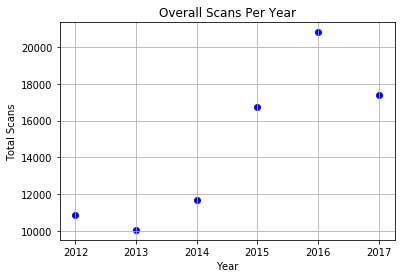

In [16]:
scans_per_year = [len(dates_2012),len(dates_2013),len(dates_2014),len(dates_2015), len(dates_2016),len(dates_2017)]
year = 2012,2013,2014,2015,2016,2017
plt.scatter(year,scans_per_year,color = "blue")
plt.grid()
plt.title("Overall Scans Per Year")
plt.xlabel("Year")
plt.ylabel("Total Scans")

In [18]:
def find_indices(month,day,year,date_array):
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return(begin,end)



In [19]:
#test!
find_indices(2,14,2017,dates_2017)

(1846, 1893)

In [20]:
#these indices can do tons of stuff!! it can print the array of times we created earlier

times_2017[1846:1893]

[[8, 41, 11],
 [8, 45, 57],
 [9, 33, 32],
 [10, 23, 16],
 [10, 32, 34],
 [10, 38, 26],
 [10, 51, 19],
 [11, 28, 44],
 [11, 44, 0],
 [11, 47, 32],
 [11, 54, 31],
 [12, 3, 26],
 [12, 17, 45],
 [12, 20, 17],
 [12, 30, 8],
 [12, 52, 27],
 [13, 47, 6],
 [13, 52, 34],
 [14, 29, 45],
 [14, 33, 40],
 [14, 55, 42],
 [15, 7, 30],
 [15, 8, 58],
 [15, 18, 37],
 [15, 20, 11],
 [15, 43, 2],
 [15, 44, 25],
 [15, 51, 49],
 [15, 52, 18],
 [15, 55, 20],
 [16, 11, 11],
 [16, 21, 18],
 [16, 27, 31],
 [16, 37, 48],
 [16, 41, 34],
 [16, 42, 40],
 [16, 53, 39],
 [17, 3, 46],
 [17, 6, 25],
 [17, 8, 21],
 [17, 16, 27],
 [17, 20, 53],
 [17, 42, 8],
 [17, 43, 24],
 [17, 59, 59],
 [18, 23, 37],
 [21, 29, 21]]

In [21]:
data_2017[1846:1893]

array([[1846, 'aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
        '2/14/2017   8:41:11AM', 'Valid Access'],
       [1847, 'jbaajdacjjbiafjcjhacjhbiaabeacbibfjhbbafaajcaibib',
        '2/14/2017   8:45:57AM', 'Valid Access'],
       [1848, 'aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
        '2/14/2017   9:33:32AM', 'Valid Access'],
       [1849, 'bbjdaabeacaaaiaijjbijejhbfbibgbbaajdacbibbh',
        '2/14/2017  10:23:16AM', 'Valid Access'],
       [1850, 'bcjiaejcaibiagjdjjbiagaabbahbib', '2/14/2017  10:32:34AM',
        'Valid Access'],
       [1851, 'bejcaiabjibejjbiaajdbbafjcaiaiaabib',
        '2/14/2017  10:38:26AM', 'Valid Access'],
       [1852, 'acjgjajgjcjejejcjjbiahjfaijcbib', '2/14/2017  10:51:19AM',
        'Valid Access'],
       [1853, 'bcjhbebbjcbejejjbiagjibebib', '2/14/2017  11:28:44AM',
        'Valid Access'],
       [1854, 'bcjiaejcaibiagjdjjbiagaabbahbib', '2/14/2017  11:44:00AM',
        'Valid Access'],
       [1855, 'bcjhbebbjcbejejjbiagjibebib', 

In [22]:
userid = []
for i in range(0,len(data_2017)):
    userid.append(data_2017[i][1])
practice = userid[1846:1893]
practice

['aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
 'jbaajdacjjbiafjcjhacjhbiaabeacbibfjhbbafaajcaibib',
 'aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
 'bbjdaabeacaaaiaijjbijejhbfbibgbbaajdacbibbh',
 'bcjiaejcaibiagjdjjbiagaabbahbib',
 'bejcaiabjibejjbiaajdbbafjcaiaiaabib',
 'acjgjajgjcjejejcjjbiahjfaijcbib',
 'bcjhbebbjcbejejjbiagjibebib',
 'bcjiaejcaibiagjdjjbiagaabbahbib',
 'bcjhbebbjcbejejjbiagjibebib',
 'afjijgaiacabjbjijdjeafjjbibfjhahjcbib',
 'bejcbcjhaiaijcjjbibdjcbebiaabeacbibfaajdjfbib',
 'bejcaiabjibejjbiaajdbbafjcaiaiaabib',
 'bejcbcjhaiaijcjjbibdjcbebiaabeacbibfaajdjfbib',
 'afjijgaiacabjbjijdjeafjjbibfjhahjcbib',
 'aiaabeabjhbeaejjbibbjhjejfbijiadjjbiacjcaijcjejcbiaabhahbibgbbaajdacbiabibh',
 'bjjgbfbdjcjdaejjbibbaajeafjfbib',
 'aiaabeabjhbeaejjbibbjhjejfbijiadjjbiacjcaijcjejcbiaabhahbibgbbaajdacbiabibh',
 'bjaabejcjejejhjjbiaaaijcbabib',
 'bjjgbfbdjcjdaejjbibbaajeafjfbib',
 'jhbeaeafaabfbibbjijgbejejfjjbiajaajdahabbijiadadjhbbjcbibgbbaajdacbidcbh',
 'aabdbdjdjgb

In [24]:
uniquepractice = np.unique(practice)
len(uniquepractice)

25

In [55]:
find_indices(7,11,2017,dates_2017)

ValueError: [7, 12, 2017] is not in list

In [43]:
def find_indices(month,day,year,date_array):
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return (begin, end) 

In [87]:
#Data collection by day for august 2017

i = 1
november2017 = []
while i <= 30:
    begin1, end1 = find_indices(8,i,2017,dates_2017)
    beginend = [begin1, end1]
    november2017.append(beginend)
    i+=1
    
print(november2017)

[[10352, 10374], [10374, 10394], [10394, 10453], [10453, 10494], [10494, 10602], [10602, 10689], [10689, 10728], [10728, 10805], [10805, 10889], [10889, 10973], [10973, 11044], [11044, 11161], [11161, 11262], [11262, 11352], [11352, 11430], [11430, 11506], [11506, 11562], [11562, 11624], [11624, 11719], [11719, 11848], [11848, 11912], [11912, 11969], [11969, 12034], [12034, 12117], [12117, 12120], [12120, 12236], [12236, 12361], [12361, 12401], [12401, 12469], [12469, 12546]]


In [111]:
userid = []
total = []
for t in range(30):
    for i in range(0,len(data_2017)):
        userid.append(data_2017[i][1])
    practice = userid[august2017[t-1][0]:august2017[t-1][1]]
    total.append(practice)
    t+=1
total

[['aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbidcbh',
  'bbjdaabeacaaaiaijjbijejhbfbibgbbaajdacbibbh',
  'aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbidcbh',
  'abafaaadjcjdjjbiagjcadadbib',
  'abafaaadjcjdjjbiagjcadadbib',
  'bbjdaabeacaaaiaijjbijejhbfbibgbbaajdacbibbh',
  'abafaaadjcjdjjbiagjcadadbib',
  'adjiaijebjjjbiabaajdaabib',
  'adjiaijebjjjbiabaajdaabib',
  'abafaabejcjdjjbibfjcaijhababaabib',
  'bbafjdjhabjejcbeabjcbejjbibfjhaijibibgbbaajdacbibbh',
  'afaajbahbijhabaiaabeacjjbibejibcjcbfbdjcjdbifbibjagbibgbbaajdacbiajbh',
  'bjjgbfbdjcjdaejjbibbaajeafjfbibgbbaajdacbibbh',
  'bbjiaibdjfjjbiagjcjdjdjfbiaabeacbiaijhbeacaabib',
  'aabejhbfaaaijjbibbjibejejdjiaibicbhaibiacjcaijcjejcbibgbh',
  'abafaabejcjdjjbibfjcaijhababaabib',
  'abafaabejcjdjjbibfjcaijhababaabib',
  'bbafjdjhabjejcbeabjcbejjbibfjhaijibibgbbaajdacbibbh',
  'jdjibdjcjdjejjbijejfaijcjdbhagjgaijhjcbibgbbaajdacbibbh',
  'afjcjdadjijdacjjbiagjcaabebibgbbaajdacbibbh',
  'abaabbahjcjejejjbijcjdjhbbaabib',
  'bdaajdjeji

In [77]:
dailyfreq = []


for i in range(30):
    dailyuserid = total[i-1]
    dailyuniqueusers = np.unique(dailyuserid)
    dailyfreq.append(len(dailyuniqueusers))
    
print(dailyfreq)
    

[32, 30, 6, 8, 19, 20, 48, 43, 20, 39, 39, 36, 33, 45, 43, 33, 30, 30, 25, 29, 39, 46, 28, 27, 27, 27, 2, 44, 48, 17]


In [86]:
date = []

for i in range(30):
    i+=1
    date.append(i)
    
print(date)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


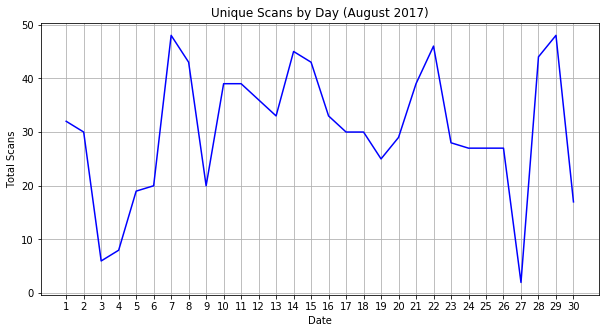

[32, 30, 6, 8, 19, 20, 48, 43, 20, 39, 39, 36, 33, 45, 43, 33, 30, 30, 25, 29, 39, 46, 28, 27, 27, 27, 2, 44, 48, 17]


In [105]:
plt.plot(date, dailyfreq, color = 'blue')
plt.grid()
plt.title("Unique Scans by Day (August 2017)")
plt.xlabel("Date")
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.ylabel("Total Scans")
#plt.figure(figsize=(8,12))
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()
print(dailyfreq)

In [113]:
i = 1
november2016 = []
while i <= 29:
    begin1, end1 = find_indices(11,i,2016,dates_2016)
    beginend = [begin1, end1]
    november2017.append(beginend)
    i+=1
    
print(november2016)

userid112016 = []
total112016 = []
for t in range(30):
    for i in range(0,len(data_2016)):
        userid112016.append(data_2016[i][1])
    practice112016 = userid112016[november2016[t-1][0]:november2016[t-1][1]]
    total.append(practice112016)
    t+=1
total112016

dailyfreq112016 = []


for x in range(30):
    dailyuserid112016 = total[x-1]
    dailyuniqueusers112016 = np.unique(dailyuserid112016)
    dailyfreq112016.append(len(dailyuniqueusers112016))
    
print(dailyfreq112016)

plt.plot(date, dailyfreq112016, color = 'blue')
plt.grid()
plt.title("Unique Scans by Day (November 2016)")
plt.xlabel("Date")
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.ylabel("Total Scans")
#plt.figure(figsize=(8,12))
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

[]


IndexError: list index out of range